#### SVM
##### Binary Classification on Linearly Separable Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:


# X represents the features (our data points)
X = np.array([
    [1, 2],
    [2, 3],
    [3, 3],
    [2, 1],
    [1, 1],
    [7, 8],
    [8, 8],
    [9, 7],
    [8, 6],
    [7, 9]
])

# y represents the labels (the class for each data point)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### creating fitting SVM linear

In [5]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 1.00


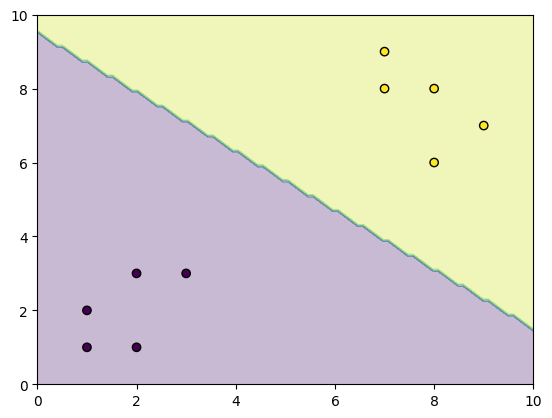

In [7]:
def plot_decision_boundary(X, y, model):
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.show()

plot_decision_boundary(X, y, clf)

#### Non-linear Data with RBF Kernel and Hyperparameter Tuning

##### Radial Basis Function (RBF) kernel

In [9]:

from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV

In [10]:
# Generate non-linear data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- 5 fold cross validation
- testing 16 different SVM model , 4C*4gamma



In [11]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 0.5, 1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 0.5, 1],
                         'kernel': ['rbf']})

In [12]:
# Best parameters and model
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


In [13]:
best_model = grid_search.best_estimator_

# Predictions and accuracy
y_pred = best_model.predict(X_test)
print(f"Accuracy with RBF Kernel and GridSearch: {accuracy_score(y_test, y_pred):.2f}")

Accuracy with RBF Kernel and GridSearch: 0.97


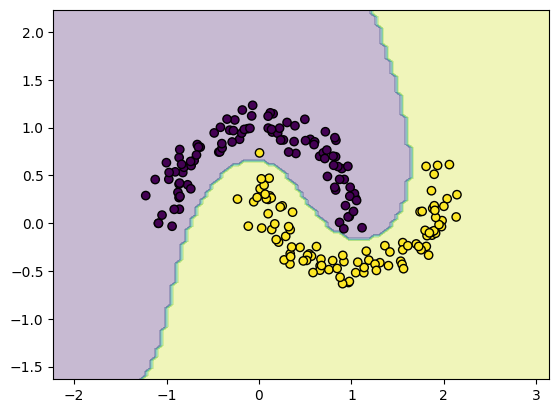

In [14]:
# Plot decision boundary
plot_decision_boundary(X, y, best_model)

#### SVR

In [16]:
from sklearn.svm import SVR

In [15]:
# X = Years of Experience (Feature)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)

# y = Salary in thousands (Target)
# We add some non-linear noise to make it more realistic for SVR.
y = np.array([45, 50, 60, 65, 70, 80, 95, 110, 120, 130])

In [17]:
# 'rbf' kernel, which is effective for non-linear relationships.
# C is the regularization parameter.
# gamma defines the influence of a single training example.
svr_model = SVR(kernel='rbf', C=100, gamma=0.1)

In [18]:
svr_model.fit(X, y)

SVR(C=100, gamma=0.1)

In [19]:
# Let's predict the salary for someone with 6.5 years of experience.
years_of_experience = np.array([[6.5]])
predicted_salary = svr_model.predict(years_of_experience)

print(f"Predicted salary for {years_of_experience[0][0]} years of experience: ${predicted_salary[0]:.2f}k")

Predicted salary for 6.5 years of experience: $87.08k


C:\Users\Danish\AppData\Local\Temp\ipykernel_6728\1559935579.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)


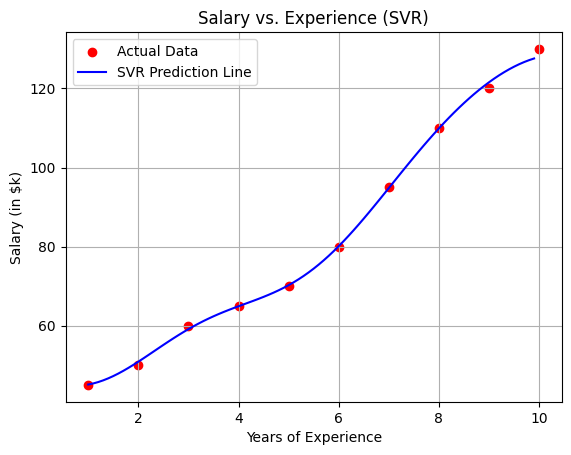

In [20]:
# Generate a smooth line for the model's predictions
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)
y_pred_smooth = svr_model.predict(X_grid)

# Plot the original data points
plt.scatter(X, y, color='red', label='Actual Data')

# Plot the SVR prediction line
plt.plot(X_grid, y_pred_smooth, color='blue', label='SVR Prediction Line')

plt.title('Salary vs. Experience (SVR)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in $k)')
plt.legend()
plt.grid(True)
plt.show()